In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

We've talked about Random Forests. Now it's time to build one.

Here we'll use data from Lending Club to predict the state of a loan given some information about it. You can find the dataset [here](https://www.lendingclub.com/info/download-data.action). We'll use 2015 data. ([Thinkful mirror](https://www.dropbox.com/s/m7z42lubaiory33/LoanStats3d.csv?dl=0))

In [39]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    low_memory=False,
    header=1,
)

# Note the warning about dtypes.

In [40]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [41]:
y2015.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,217133.000000,...,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05
mean,5.759576e+07,15240.285862,15240.285862,15234.156412,441.860087,7.696561e+04,19.195989,0.347397,0.572690,34.023391,...,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04
std,1.013358e+07,8571.325901,8571.325901,8567.935752,244.851179,7.394996e+04,23.504038,0.927695,0.867776,21.990270,...,0.522758,1.853858,8.875399,36.054458,0.385975,0.444231,1.756722e+05,4.907494e+04,21840.371112,4.394271e+04
min,7.082500e+04,1000.000000,1000.000000,900.000000,23.400000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000,0.000000e+00
25%,4.922617e+07,8500.000000,8500.000000,8500.000000,263.930000,4.600000e+04,12.590000,0.000000,0.000000,15.000000,...,0.000000,1.000000,90.900000,15.400000,0.000000,0.000000,5.090900e+04,2.259850e+04,7800.000000,1.548150e+04
50%,5.895358e+07,14000.000000,14000.000000,14000.000000,385.410000,6.500000e+04,18.600000,0.000000,0.000000,31.000000,...,0.000000,2.000000,97.400000,50.000000,0.000000,0.000000,1.114050e+05,3.959600e+04,15200.000000,3.297000e+04
75%,6.604584e+07,20000.000000,20000.000000,20000.000000,578.790000,9.169050e+04,25.340000,0.000000,1.000000,50.000000,...,0.000000,3.000000,100.000000,75.000000,0.000000,0.000000,2.496290e+05,6.565100e+04,28600.000000,5.829900e+04
max,7.354484e+07,35000.000000,35000.000000,35000.000000,1445.460000,9.500000e+06,9999.000000,39.000000,6.000000,176.000000,...,39.000000,30.000000,100.000000,100.000000,11.000000,85.000000,9.999999e+06,2.921551e+06,834300.000000,2.101913e+06


## The Blind Approach

Now, as we've seen before, creating a model is the easy part. Let's try just using everything we've got and throwing it without much thought into a Random Forest. SKLearn requires the independent variables to be be numeric, and all we want is dummy variables so let's use `get_dummies` from Pandas to generate a dummy variable for every categorical column and see what happens off of this kind of naive approach.

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
#X = pd.get_dummies(X)

#cross_val_score(rfc, X, Y, cv=5)

Did your kernel die? My kernel died.

Guess it isn't always going to be that easy...

Can you think of what went wrong?

(You're going to have to reset your kernel and reload the column, BUT DON'T RUN THE MODEL AGAIN OR YOU'LL CRASH THE KERNEL AGAIN!)

## Data Cleaning

Well, `get_dummies` can be a very memory intensive thing, particularly if data are typed poorly. We got a warning about that earlier. Mixed data types get converted to objects, and that could create huge problems. Our dataset is about 400,000 rows. If there's a bad type there its going to see 400,000 distinct values and try to create dummies for all of them. That's bad. Lets look at all our categorical variables and see how many distinct counts there are...

In [42]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


Well that right there is what's called a problem. Some of these have over a hundred thousand distinct types. Lets drop the ones with over 30 unique values, converting to numeric where it makes sense. In doing this there's a lot of code that gets written to just see if the numeric conversion makes sense. It's a manual process that we'll abstract away and just include the conversion.

You could extract numeric features from the dates, but here we'll just drop them. There's a lot of data, it shouldn't be a huge problem.

In [43]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

Wonder what was causing the dtype error on the id column, which _should_ have all been integers? Let's look at the end of the file.

In [44]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

Now this should be better. Let's try again.

In [46]:
pd.get_dummies(y2015)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0
5,68506798.0,73396623.0,23000.0,23000.0,23000.0,8.49,471.77,64000.0,18.28,0.0,...,0,0,0,0,0,1,0,0,0,0
6,68566886.0,73456723.0,29900.0,29900.0,29900.0,12.88,678.49,65000.0,21.77,0.0,...,0,0,0,0,0,1,0,0,0,0
7,68577849.0,73467703.0,18000.0,18000.0,18000.0,11.99,400.31,112000.0,8.68,0.0,...,0,0,0,0,0,1,0,0,0,0
8,66310712.0,71035433.0,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,...,0,0,0,0,0,1,0,0,0,0
9,68476807.0,73366655.0,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,...,0,0,0,0,0,1,0,0,0,0


It finally works! We had to sacrifice sub grade, state address and description, but that's fine. If you want to include them you could run the dummies independently and then append them back to the dataframe.

## Second Attempt

Now let's try this model again.

We're also going to drop NA columns, rather than impute, because our data is rich enough that we can probably get away with it.

This model may take a few minutes to run.

In [10]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status',axis=1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

array([0.97934031, 0.98038517, 0.9813113 , 0.98162   , 0.97269057,
       0.9773688 , 0.95404783, 0.98095419, 0.98002707, 0.9800741 ])

The score cross validation reports is the accuracy of the tree. Here we're about 98% accurate.

That works pretty well, but there are a few potential problems. Firstly, we didn't really do much in the way of feature selection or model refinement. As such there are a lot of features in there that we don't really need. Some of them are actually quite impressively useless.

There's also some variance in the scores. The fact that one gave us only 93% accuracy while others gave higher than 98 is concerning. This variance could be corrected by increasing the number of estimators. That will make it take even longer to run, however, and it is already quite slow.

## DRILL: Third Attempt

So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

__JB:__ My plan:

* Find the features most highly correlated with loan_status
* Because loan_status is categorical, ~~I will have to break it into dummies~~ I will have to encode it (thanks, Alan), and examine the correlation between the encoded loan status and the other features.
* Choose the most highly-correlated features. Eliminate features directly associated to payment amount or outstanding principal, as suggested. There's a [data dictionary](https://resources.lendingclub.com/LCDataDictionary.xlsx) on Lending Club's site that will be helpful in deciphering the meanings of columns whose names are ambiguous.
* Build a new random forest model and do my best to achieve 90% accuracy across 10-fold cross-validation.

In [102]:
y2015_wstatus = y2015.copy(deep=True)

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y2015_wstatus['enc_loan_status'] = le.fit_transform(y2015_wstatus['loan_status'])

In [104]:
# I determined these variables to be directly related to either 
# payment amount or outstanding principal by looking at the data dictionary.
drop_these = ['installment','issue_d','last_pymnt_amnt','last_pymnt_d','next_pymnt_d','pymnt_plan',
              'out_prncp','out_prncp_inv','total_rec_prncp','total_pymnt','total_pymnt_inv',
              'total_rec_int','loan_status']

In [105]:
y2015_wstatus.drop(drop_these,axis='columns',inplace=True)

In [106]:
y2015_wstatus_corr = y2015_wstatus.corr()

In [107]:
print(y2015_wstatus_corr['enc_loan_status'].sort_values(ascending=False).head(20))

enc_loan_status         1.000000
acc_open_past_24mths    0.067779
inq_last_12m            0.067297
num_tl_op_past_12m      0.065113
open_acc_6m             0.063305
open_il_24m             0.060845
open_il_12m             0.057983
annual_inc_joint        0.052747
open_rv_24m             0.052194
il_util                 0.047749
open_rv_12m             0.045003
total_acc               0.038731
inq_fi                  0.036350
inq_last_6mths          0.034212
total_rec_late_fee      0.032253
mort_acc                0.028693
total_cu_tl             0.028609
int_rate                0.028432
num_il_tl               0.027653
pub_rec_bankruptcies    0.025173
Name: enc_loan_status, dtype: float64


In [108]:
highly_correlated = ['acc_open_past_24mths','inq_last_12m','num_tl_op_past_12m','open_acc_6m','open_il_24m',
                     'open_il_12m','annual_inc_joint','open_rv_24m','il_util','open_rv_12m','total_acc',
                     'inq_fi','inq_last_6mths','total_rec_late_fee','mort_acc','total_cu_tl','int_rate',
                     'num_il_tl','pub_rec_bankruptcies',
                    ]

In [109]:
rfc = ensemble.RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=4)
X = y2015_wstatus.drop('enc_loan_status',axis=1) #y2015_wstatus[highly_correlated] #
Y = y2015_wstatus['enc_loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.7045665 , 0.77678041, 0.73484363, 0.77450072, 0.7848967 ,
       0.81161244, 0.77356385, 0.8006127 , 0.76811457, 0.83061796])

Running with the default settings for the classifier, and with all of the variables intact, resulted in some messy results.

    array([0.74484102, 0.78409442, 0.76509701, 0.77414452, 0.7195678 ,
           0.66775113, 0.53575245, 0.45681446, 0.42266132, 0.40654539])


Switching the criterion from 'gini' to 'entropy' gave marginally better results:

    array([0.75702311, 0.81038209, 0.78910498, 0.72978557, 0.80755165,
           0.62101639, 0.5234273 , 0.53432758, 0.51091267, 0.41661521])
       
Then I bumped up the number of estimators to 100 (in part to stop the warning messages), and reduced the set of features to just the highly-correlated ones. This took a really long time to run, as can be supposed when you increase the number of trees tenfold. The results are a lot more consistent across folds than when I ran with fewer estimators.

    array([0.6576429 , 0.65213365, 0.65213365, 0.64964024, 0.64780337,
           0.64889575, 0.64546771, 0.64608516, 0.63818367, 0.59808578])

I also tried to run the entire dataset with 100 estimators, but got impatient. :)

Forcing a max_depth=5 helped! I eventually got back some better looking numbers:

    array([0.70347415, 0.81838475, 0.82156681, 0.831208  , 0.82521966,
           0.82906673, 0.8236244 , 0.80659716, 0.82834208, 0.83061796])

So not 90%, but these are the best numbers of this bunch.

### Maybe PCA?

Or maybe not...here's what I attempted, anyway.

In [59]:
categorical = y2015.describe(exclude=np.number).columns.tolist()

In [72]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = y2015.copy(deep=True)
X.drop('loan_status',axis='columns',inplace=True)
X = pd.get_dummies(X)
#for cat in categorical:
#    X.drop(cat,axis='columns',inplace=True)

In [73]:
X = X.dropna(axis=1)
X = StandardScaler().fit_transform(X)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00000237e+00  9.97542503e-01 -8.28800909e-03 ...  3.16988700e-02
   1.52046554e-02  2.45114833e-02]
 [ 9.97542503e-01  1.00000237e+00 -8.61952110e-03 ...  3.20023212e-02
   1.53795433e-02  2.47610695e-02]
 [-8.28800909e-03 -8.61952110e-03  1.00000237e+00 ...  8.35951079e-03
   7.08866573e-03  1.43504240e-02]
 ...
 [ 3.16988700e-02  3.20023212e-02  8.35951079e-03 ...  1.00000237e+00
  -3.12145102e-04 -5.16540667e-04]
 [ 1.52046554e-02  1.53795433e-02  7.08866573e-03 ... -3.12145102e-04
   1.00000237e+00 -2.39751698e-04]
 [ 2.45114833e-02  2.47610695e-02  1.43504240e-02 ... -5.16540667e-04
  -2.39751698e-04  1.00000237e+00]]


In [80]:
X.shape

(421095, 151)

In [74]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[-1.19909016e-02 -1.20764106e-02  2.42314115e-01  2.42314115e-01
  2.42320572e-01  2.45045745e-02  2.24664723e-01  1.16773804e-01
  1.93675394e-02  1.06473597e-03  2.66056769e-02  1.87212786e-01
 -2.96097998e-02  1.66270513e-01  1.74064631e-01  1.43478417e-01
  1.43489421e-01  1.91906498e-01  1.91904175e-01  1.58297272e-01
  1.78697666e-01  8.42500248e-03  6.73564694e-03  6.94950418e-03
  8.87474101e-02 -8.38559570e-03  0.00000000e+00  3.91490440e-03
 -5.23965702e-03  1.71556556e-01  1.81826170e-01  8.15953172e-02
  9.21405385e-02  2.96068727e-05  7.51152027e-04  9.29219455e-02
 -2.88893387e-02 -3.70186108e-02  1.17034984e-01 -1.31327015e-02
  1.65034082e-01  1.63684997e-01  1.74323357e-01  1.60941684e-01
  6.80185679e-02  1.75574592e-01  1.63386961e-01  1.86977779e-01
  4.83117333e-03 -8.81814557e-03  6.10882172e-02  4.74205005e-02
 -3.72769024e-02 -3.95281907e-03  1.82889041e-01  1.58647689e-01
  1.85256840e-01  1.09862893e-01 -1.05988434e-01  1.05988434e-01
  7.49601

  1.99925574e-02]
Eigenvalue 88: 0.6981206841878663
----------------------------------------
Eigenvector 89: 
[-3.50488504e-01 -3.92452732e-01 -3.50280419e-02 -3.50280419e-02
 -3.52263282e-02  2.66366605e-02  2.78925439e-02 -7.25526368e-04
 -1.89277750e-03 -1.97449590e-03 -9.20356256e-04  3.88540510e-03
  3.13333967e-03  3.19917169e-02  3.60754567e-03 -5.34659417e-02
 -5.36317842e-02  3.96569280e-02  3.95263836e-02  7.97304911e-03
  1.24207879e-01 -8.75396482e-04 -3.18055017e-03 -8.98771268e-04
 -6.82794333e-02 -4.48264114e-04  0.00000000e+00  6.59032193e-04
  5.39707641e-05 -1.67492753e-02 -9.33608798e-03 -1.24576367e-03
  7.02372627e-03 -9.68665419e-04 -2.25827930e-04  6.67609279e-04
 -1.74272796e-04  5.43783189e-04 -1.68960469e-03  9.52536896e-04
 -6.22126254e-03  2.80250580e-03  2.28221453e-03 -4.39800424e-03
 -2.65323598e-03 -1.01688434e-02  5.60102404e-03  2.85854955e-03
 -7.63012276e-04  1.87426086e-03  2.37409351e-03 -1.10082039e-04
 -1.50410679e-03 -3.12523464e-03  1.18206833e

 -3.02066718e-01]
Eigenvalue 153: 1.0300866669939466
----------------------------------------
Eigenvector 154: 
[ 8.16410727e-03  1.00875948e-02  2.95545821e-03  2.95545821e-03
  2.94455071e-03 -2.96622893e-03 -3.16995030e-04  8.32874055e-03
 -3.04046915e-02 -1.66975203e-02  1.49937228e-02  2.21479079e-03
 -4.75091553e-05 -3.02939118e-03  2.41155054e-04  9.47558389e-03
  9.46966332e-03 -2.95400981e-03 -2.95897088e-03 -2.40553944e-03
 -1.61140392e-03 -1.70152406e-02 -5.24950023e-03 -5.25180968e-03
  5.10764724e-04  4.81197624e-02  0.00000000e+00  2.99608653e-04
  5.14507358e-02 -6.22052931e-04  2.92679022e-03 -1.19500460e-03
 -1.97862402e-03 -3.46827561e-03  4.90881084e-02 -4.39780429e-03
  8.10938738e-03  8.28446240e-03  1.16625714e-03  1.48429632e-02
  4.84104278e-04 -4.92611861e-03  2.52675769e-03  6.18521318e-04
  1.32511497e-03  7.80592092e-04 -2.80014290e-03  2.51402875e-03
 -9.74768983e-03 -8.75184493e-03 -1.37705112e-03  1.34274969e-03
 -7.30263264e-03  3.64907346e-03  5.1491193

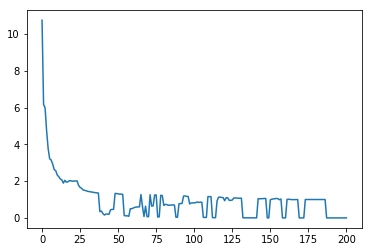

[ 1.07424274e+01  6.17082352e+00  5.97206210e+00  4.73791190e+00
  3.77564364e+00  3.21357484e+00  3.14702889e+00  2.92371680e+00
  2.62559544e+00  2.56554441e+00  2.32939154e+00  2.24159049e+00
  2.11726950e+00  2.06220462e+00  1.89177850e+00  2.04268761e+00
  1.94225088e+00  1.96360284e+00  2.02265265e+00  2.01611188e+00
  1.99577194e+00  2.00122713e+00  2.00560628e+00  2.01117818e+00
  1.77381987e+00  1.65788191e+00  1.60949220e+00  1.51957843e+00
  1.50153670e+00  1.47345274e+00  1.44496490e+00  1.42930440e+00
  1.40904602e+00  1.39792879e+00  1.37702578e+00  1.37247939e+00
  1.35979889e+00  1.35164114e+00  3.40722825e-01  3.75425093e-01
  2.37054225e-01  1.56369106e-01  2.12072172e-01  2.08312086e-01
  1.97710976e-01  4.41825632e-01  4.59927841e-01  4.64223037e-01
  1.33105349e+00  1.32561071e+00  1.30940566e+00  1.29159919e+00
  1.29908796e+00  1.27829701e+00  1.28008907e-01  1.11757540e-01
  1.15454621e-01  8.81590513e-02  4.99230477e-01  5.02298195e-01
  5.41915503e-01  5.76549

In [75]:
# print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

Which of these components are worth keeping? I played around with this--threshold defines the minimum value to keep. As I understand PCA, worthwhile components offer more than 1 variable's worth of information.

So I set the initial threshold to 1, realized that suggested 87 variables, then raised the threshold to something a little more reasonable. At 1.5, the first 29 variables made the cut. Easy enough!

In [86]:
threshold = 1.5
worthy_components = []
for i in range(0,len(eig_val_cov)):
    if eig_val_cov[i] > threshold:
        worthy_components.append(i)
len(worthy_components)

29

In [87]:
worthy_components

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

So after all of that I realized you can just feed the PCA object a percentage and it will choose enough components to reach that percentage.

In [92]:
sklearn_pca = PCA(n_components=.9)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.99842433]


In [101]:
rfc = ensemble.RandomForestClassifier(criterion='entropy') #,n_estimators=100,max_depth=5)

cross_val_score(rfc, X, Y_sklearn.reshape(-1,1), cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

...And now I'm realizing that I don't know what to do with the output from PCA. I thought I just needed to feed it to the model, but apparently not? I'll follow up with my mentor.